# Multi Plane 2D model
- The solver is in the package "Model_2D_Package"
- Solves for however nk number of k:s
- Currently running tf = 50 and nu = 100 (dicretization of control)

In [27]:
%reset -f
import matplotlib.pyplot as plt
from casadi import *
import numpy as np

import importlib
import Model_2D_Package.Multi_Plane_2D_solver as model
importlib.reload(model)

<module 'Model_2D_Package.Multi_Plane_2D_solver' from 'C:\\Users\\irmas\\Documents\\TUM\\CaseCourse\\CasADi\\Main\\Model_2D\\Model_2D_Package\\Multi_Plane_2D_solver.py'>

# Multi Plane Solver

Solver options
- w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
- w_opt, J_opt = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt)

Other functions
- plot_multi_plane_2D(w_opt,k_values)
    - plots optimal trajectories for all planes
- u_opt = u_opt_return(w_opt)
- sol = reconstruction_multi_plane_2D(u_opt,k_value,multiplier)
    - Reconstructs the state trajectory, sol is a dictonary
- simulate_trajectories(u_opt, M)
    - MC simulation, plot and compute crash rate

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 37

                                   (scaled)                 (unscaled)
Objective...............:  -1.6371667456830605e+00   -1.6371667456830605e+00
Dual infeasibility......:   5.8973981705172987e-10    5.8973981705172987e-10
Constraint violation....:   3.9389931316691218e-09    3.9389931316691218e-09
Variable bound violation:   9.9516186402581752e-09    9.9516186402581752e-09
Complementari

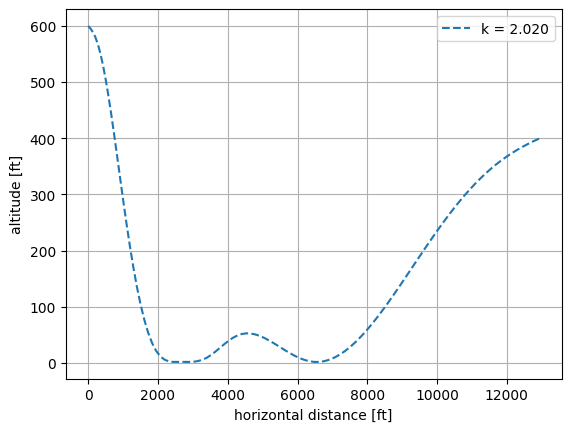

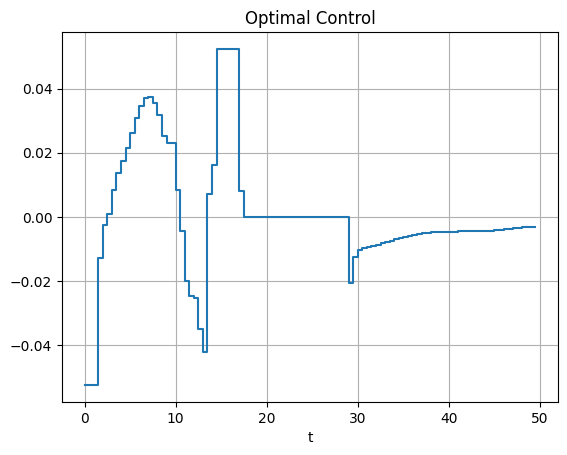

In [20]:
# what k are infeasible: 2.025 and above for

k_values=[2.02]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)


# Multi Plane Solution

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 69

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641535129314e+01   -8.3496641535129314e+01
Dual infeasibility......:   6.2926821217266119e-09    6.2926821217266119e-09
Constraint violation....:   1.0739995559561066e-09    1.0739995559561066e-09
Variable bound violation:   9.8567599637888748e-09    9.8567599637888748e-09
Complementari

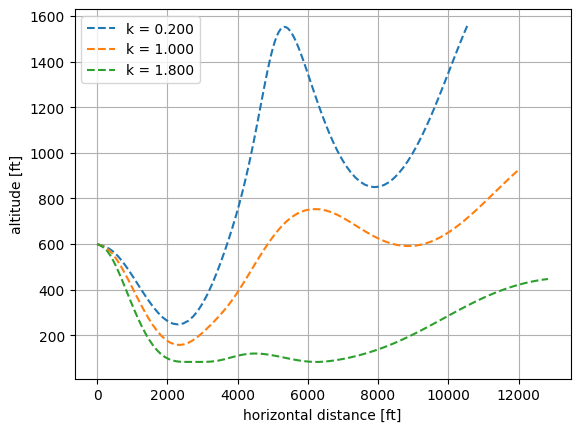

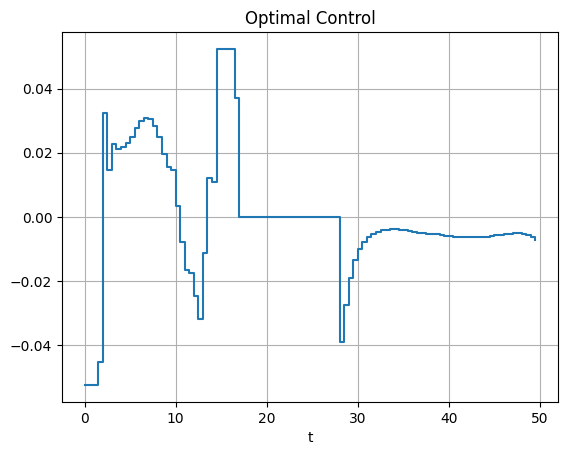

In [21]:
# k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2, 1, 1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
# plot
print(-J_opt)
model.plot_multi_plane_2D(w_opt,k_values)

# MC Single Plane

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 30

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641646399212e+01   -8.3496641646399212e+01
Dual infeasibility......:   1.9881344264622961e-09    1.9881344264622961e-09
Constraint violation....:   4.2496139940340072e-10    4.2496139940340072e-10
Variable bound violation:   9.9522398100404530e-09    9.9522398100404530e-09
Complementari

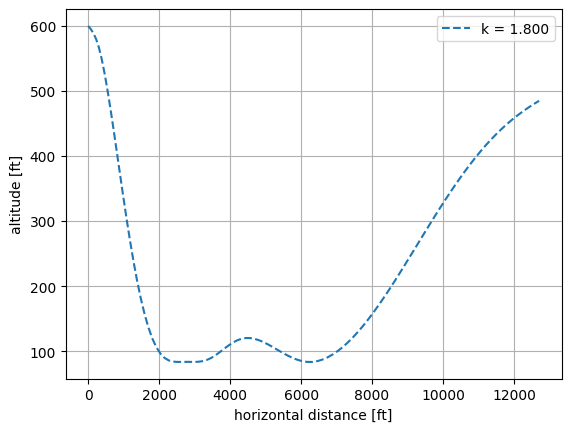

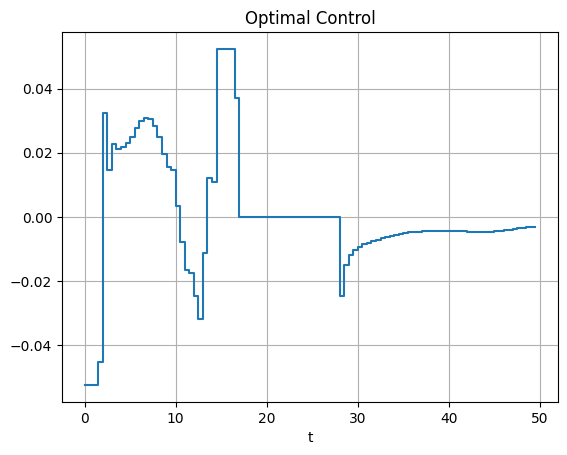

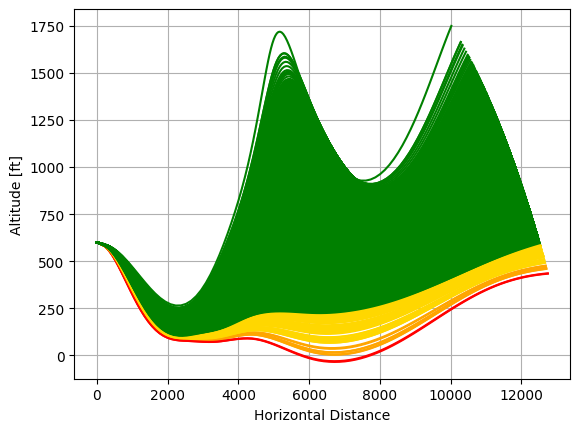

min k from sample: 0.049
max k from sample: 1.881
Minimum altitude over all runs: -34.155
Crash rate: 0.02%
Fail 50 feet rate: 0.08%
Fail 100 rate: 0.75%
x2dotdot < -0.5g: 0
x2dotdot > 1.5g: 0


In [22]:
k_values=[1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid=1)
# check for violations
print("x2dotdot < -2g:", len(violations['x2dotdot_low']))
print("x2dotdot > 10g:", len(violations['x2dotdot_high']))

# MC Multi Plane

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 69

                                   (scaled)                 (unscaled)
Objective...............:  -8.3496641535129314e+01   -8.3496641535129314e+01
Dual infeasibility......:   6.2926821217266119e-09    6.2926821217266119e-09
Constraint violation....:   1.0739995559561066e-09    1.0739995559561066e-09
Variable bound violation:   9.8567599637888748e-09    9.8567599637888748e-09
Complementari

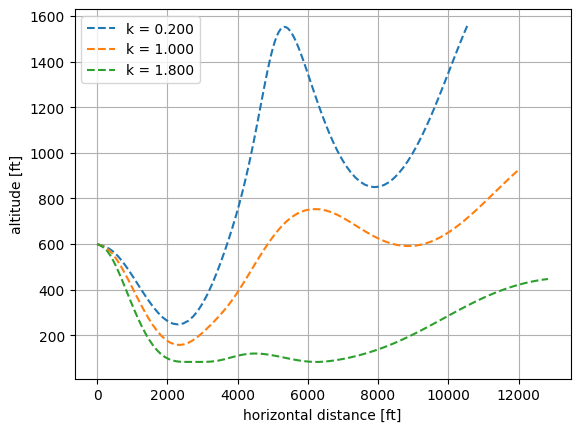

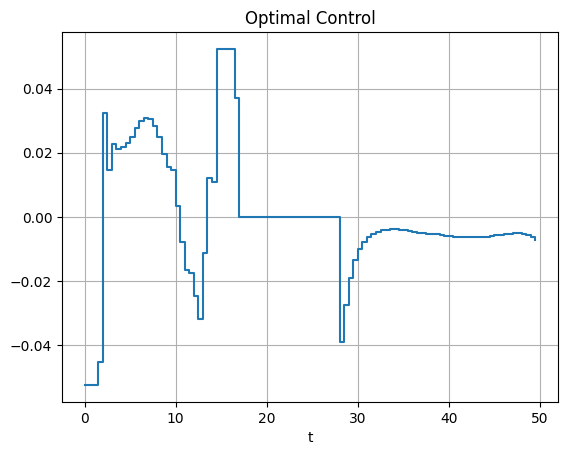

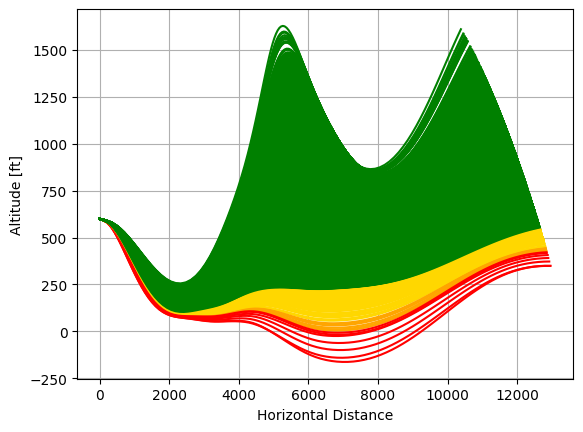

min k from sample: 0.133
max k from sample: 2.011
Minimum altitude over all runs: -163.063
Crash rate: 0.06999999999999999%
Fail 50 feet rate: 0.13%
Fail 100 rate: 0.96%
x2dotdot < -2g: 0
x2dotdot > 10g: 0


In [24]:
#k_values=[0.16893564,0.52770603,0.84582335,1.15417665,1.47229397,1.83106436]
k_values=[0.2, 1, 1.8]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid=1)
# check for violations
print("x2dotdot < -2g:", len(violations['x2dotdot_low']))
print("x2dotdot > 10g:", len(violations['x2dotdot_high']))


With the old constraint of [-2g, 10g] resulted in only the largest k value having an effect on the result. But with the tighter constraint of [-0.5g, 2g] it now has an impact on the results

# Multi Plane with better initial guess

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924153733572820e+02   -5.0924153733572820e+02
Dual infeasibility......:   2.9524189001305110e-12    2.9524189001305110e-12
Constraint violation....:   2.0423799691524049e-10    2.4556356947869062e-10
Variable bound violation:   9.9847942136577217e-09    9.9847942136577217e-09
Complementari

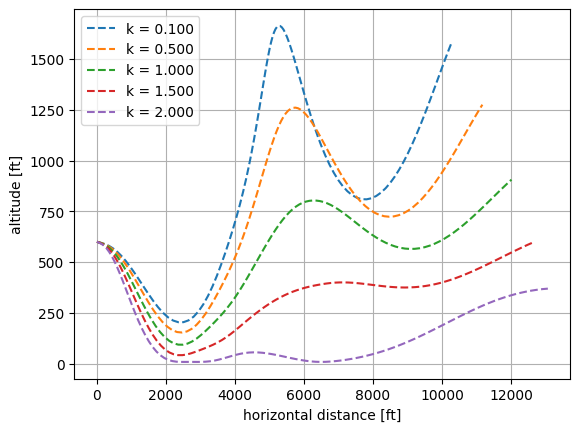

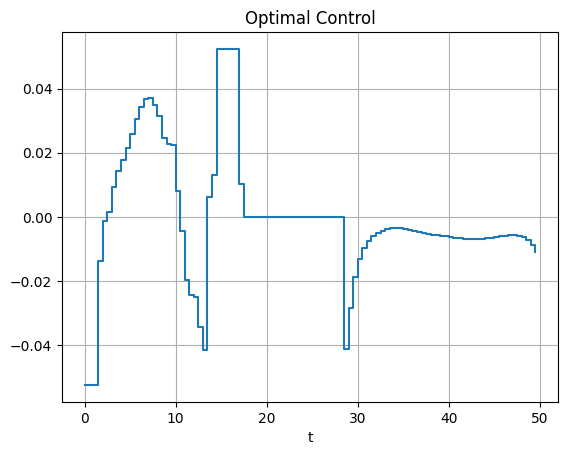

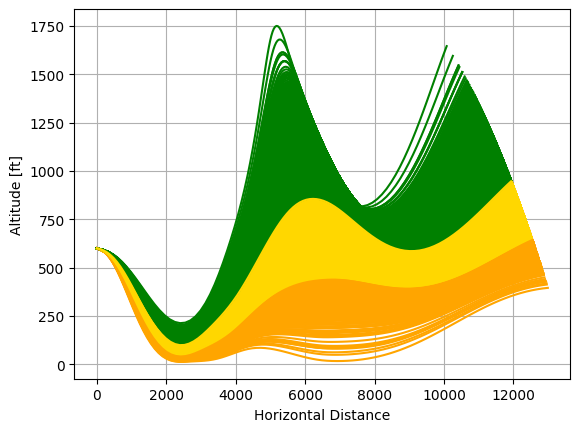

min k from sample: 0.018
max k from sample: 1.908
Minimum altitude over all runs: 12.957
Crash rate: 0.0%
Fail 50 feet rate: 4.84%
Fail 100 rate: 59.58%
x2dotdot < -2g: 0
x2dotdot > 10g: 0


In [25]:
# Prep initial guess
w_opt,_ = model.solve_ocp_multi_plane_min_h([1])
x_opt = w_opt[model.params.nu+1:].tolist()
u_opt = w_opt[1:model.params.nu+1].tolist()

# solve multi plane problem
k_values=[0.1, 0.5, 1, 1.5, 2]
w_opt, _ = model.solve_ocp_multi_plane_min_h_initial_geuss_help(k_values, x_opt, u_opt)
# plot
model.plot_multi_plane_2D(w_opt,k_values)
# get the computed optimal control
u_opt = model.u_opt_return(w_opt)
# MC
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid=1)
# check for violations
print("x2dotdot < -2g:", len(violations['x2dotdot_low']))
print("x2dotdot > 10g:", len(violations['x2dotdot_high']))


#  Negative k values

Total number of variables............................:     1601
                     variables with only lower bounds:      301
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      300
Total number of equality constraints.................:     1500
Total number of inequality constraints...............:      603
        inequality constraints with only lower bounds:      303
   inequality constraints with lower and upper bounds:      300
        inequality constraints with only upper bounds:        0


Number of Iterations....: 119

                                   (scaled)                 (unscaled)
Objective...............:  -5.8919460204974291e+02   -5.8919460204974291e+02
Dual infeasibility......:   4.8651439506167256e-10    4.8651439506167256e-10
Constraint violation....:   6.3664629124104977e-12    6.3664629124104977e-12
Variable bound violation:   9.9572364103961419e-09    9.9572364103961419e-09
Complementar

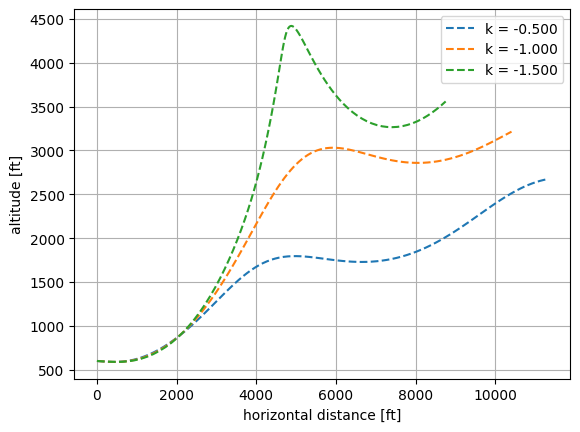

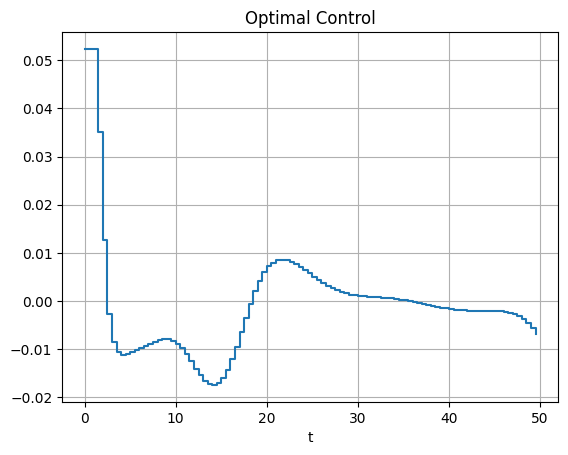

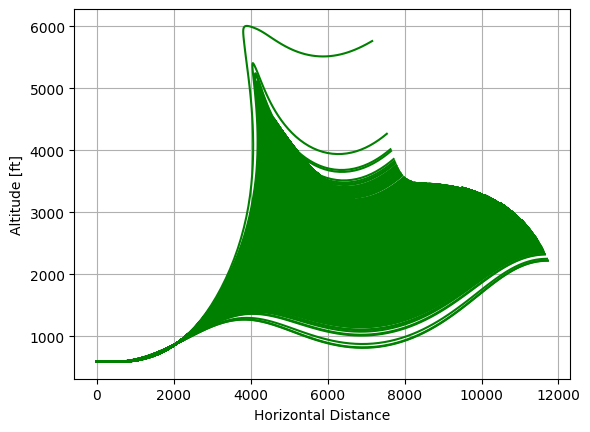

min k from sample: -2.144
max k from sample: -0.111
Minimum altitude over all runs: 589.148
Crash rate: 0.0%
Fail 50 feet rate: 0.0%
Fail 100 rate: 0.0%
x2dotdot < -2g: 0
x2dotdot > 10g: 0


In [26]:
k_values=[-0.5, -1, -1.5]
w_opt, _ = model.solve_ocp_multi_plane_min_h(k_values)
model.plot_multi_plane_2D(w_opt, k_values)
u_opt= model.u_opt_return(w_opt)
violations = model.simulate_trajectories(u_opt=u_opt, M=10000, k_mid = -1)
# check for violations
print("x2dotdot < -2g:", len(violations['x2dotdot_low']))
print("x2dotdot > 10g:", len(violations['x2dotdot_high']))

# Testing optimality of control

In [65]:
k_values=[1]
w_opt, J_opt = model.solve_ocp_multi_plane_min_h(k_values)
u_opt= model.u_opt_return(w_opt)

w = w_opt[model.params.nu + 1:]
x5_opt = w[4::5]
biggest_alpha_viol = max(x5_opt-model.params.alphamax)

N = len(u_opt)
eps = 0.01*model.params.umax
h_mins = []
h_mins_violations = []

for i in range(N):
    u_perturbed = u_opt
    u_perturbed[i] += eps
    sol = model.reconstruction_multi_plane_2D(u_perturbed,k_values)
    if min(sol['hdotdot'])<-2*model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif min(sol['hdotdot'])>10*model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif max(sol['alpha'])>model.params.alphamax+1e-08:
        h_mins_violations.append(float(min(sol['h'])))
    else:
        h_mins.append(float(min(sol['h'])))
  
for i in range(N):
    u_perturbed = u_opt
    u_perturbed[i] -= eps
    sol = model.reconstruction_multi_plane_2D(u_perturbed,k_values)
    if min(sol['hdotdot'])<-2*model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif min(sol['hdotdot'])>10*model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif max(sol['alpha'])>model.params.alphamax+1e-08:
        h_mins_violations.append(float(min(sol['h'])))
    else:
        h_mins.append(float(min(sol['h']))) 

print('computed optimal value: ',-J_opt)
print('Biggest max alpha violation in original: ', biggest_alpha_viol)
print('max min altitude for other u, (with no violations): ', max(h_mins))
print('Difference: ', (-J_opt)-max(h_mins))

Total number of variables............................:      601
                     variables with only lower bounds:      101
                variables with lower and upper bounds:      100
                     variables with only upper bounds:      100
Total number of equality constraints.................:      500
Total number of inequality constraints...............:      201
        inequality constraints with only lower bounds:      101
   inequality constraints with lower and upper bounds:      100
        inequality constraints with only upper bounds:        0


Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:  -5.0924153733572820e+02   -5.0924153733572820e+02
Dual infeasibility......:   2.9524189001305110e-12    2.9524189001305110e-12
Constraint violation....:   2.0423799691524049e-10    2.4556356947869062e-10
Variable bound violation:   9.9847942136577217e-09    9.9847942136577217e-09
Complementari

In [68]:
import numpy as np

M = 1000
eps = 0.0001 * model.params.umax  # std dev of noise
N = len(u_opt)

h_mins = []
h_mins_violations = []

for _ in range(M):
    noise = np.random.normal(loc=0.0, scale=eps, size=N)
    u_perturbed = np.array(u_opt) + noise  # make sure it's a new array

    sol = model.reconstruction_multi_plane_2D(u_perturbed, k_values)

    # Check constraints
    if min(sol['hdotdot']) < -2 * model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif min(sol['hdotdot']) > 10 * model.params.g:
        h_mins_violations.append(float(min(sol['h'])))
    elif max(sol['alpha']) > model.params.alphamax + 1e-08:
        h_mins_violations.append(float(min(sol['h'])))
    else:
        h_mins.append(float(min(sol['h'])))

# Results summary
print('computed optimal value: ', -J_opt)
print('Biggest max alpha violation in original: ', biggest_alpha_viol)
print('max min altitude for other u (no violations): ', max(h_mins) if h_mins else "None")
print('Difference: ', (-J_opt) - (max(h_mins) if h_mins else 0))


computed optimal value:  [509.24153734]
Biggest max alpha violation in original:  9.984794213657722e-09
max min altitude for other u (no violations):  509.2330972833614
Difference:  [0.00844005]
